In [2]:
library(googledrive)
library (dplyr)
library (ggplot2)
library (janitor)
library (readr)
library (rms)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units

Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve



In [5]:
#drive_download('cops.csv')
cops=read_csv('cops.csv')

Warning message:
“Duplicated column names deduplicated: 'BMI' => 'BMI_1' [25]”Parsed with column specification:
cols(
  .default = col_integer(),
  Sex = col_character(),
  BMI = col_double(),
  Etiology = col_character(),
  Hb = col_double(),
  MCV = col_double(),
  `Total Bili` = col_double(),
  `Direct Bili` = col_double(),
  ALP = col_double(),
  `Total protein` = col_double(),
  Albumin = col_double(),
  Creatinine = col_double(),
  HbA1c = col_double(),
  CRP = col_double(),
  BMI_1 = col_double(),
  `COPPS Group` = col_character(),
  ESWL = col_character(),
  Endotherapy = col_character(),
  `Bile duct stricture` = col_character(),
  Thrombosis = col_character(),
  `GI bleed` = col_character()
  # ... with 2 more columns
)
See spec(...) for full column specifications.


In [9]:
cops=clean_names(cops)

In [3]:
str(cops)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	75 obs. of  40 variables:
 $ age                       : int  34 27 23 24 57 38 40 55 50 30 ...
 $ sex                       : chr  "M" "M" "F" "M" ...
 $ weight                    : int  75 65 48 50 60 55 62 54 36 43 ...
 $ height                    : int  182 167 161 170 176 170 158 169 159 170 ...
 $ bmi                       : num  22.6 23.3 18.5 17.3 19.4 19 24.8 18.9 14.2 14.9 ...
 $ npr                       : int  7 5 6 5 4 6 4 5 6 5 ...
 $ etiology                  : chr  "Alcoholic" "Idiopathic" "Autoimmune" "idiopathic" ...
 $ hb                        : num  12.9 14.2 8.5 12.9 9.8 8.8 10.9 14.1 8.8 9.8 ...
 $ mcv                       : num  86.4 91 77.9 68.2 88 ...
 $ wbc                       : int  5500 8000 28000 9300 10100 5800 6200 7300 12600 9000 ...
 $ platelets                 : int  184 261 68 201 486 82 389 218 511 126 ...
 $ total_bili                : num  0.5 0.6 2.8 0.3 0.8 2.8 0.79 0.3 0.3 0.6 ...
 $ direct_bili     

In [10]:
d=datadist(cops)
options(datadist='d')

In [10]:
m1=ols(mean_days_admitted ~ copps_score,data=cops)
m1

Linear Regression Model
 
 ols(formula = mean_days_admitted ~ copps_score, data = cops)
 
                Model Likelihood     Discrimination    
                   Ratio Test           Indexes        
 Obs      75    LR chi2     72.01    R2       0.617    
 sigma4.0373    d.f.            1    R2 adj   0.612    
 d.f.     73    Pr(> chi2) 0.0000    g        5.464    
 
 Residuals
 
     Min      1Q  Median      3Q     Max 
 -6.9400 -2.8149 -0.5646  0.9349  9.1851 
 
 
             Coef    S.E.   t     Pr(>|t|)
 Intercept   -7.9338 2.4719 -3.21 0.0020  
 copps_score  2.8749 0.2650 10.85 <0.0001 
 

In [18]:
m1.1=ols(mean_days_admitted ~ rcs(copps_score,4),data=cops)
m1.1

Linear Regression Model
 
 ols(formula = mean_days_admitted ~ rcs(copps_score, 4), data = cops)
 
                Model Likelihood     Discrimination    
                   Ratio Test           Indexes        
 Obs      75    LR chi2     96.80    R2       0.725    
 sigma3.4700    d.f.            3    R2 adj   0.713    
 d.f.     71    Pr(> chi2) 0.0000    g        6.215    
 
 Residuals
 
     Min      1Q  Median      3Q     Max 
 -7.5427 -2.5427  0.0712  1.7392  6.6353 
 
 
               Coef     S.E.   t     Pr(>|t|)
 Intercept      -0.1765 7.4693 -0.02 0.9812  
 copps_score     1.4573 1.0512  1.39 0.1700  
 copps_score'    8.4925 2.8812  2.95 0.0043  
 copps_score'' -27.5854 7.7047 -3.58 0.0006  
 

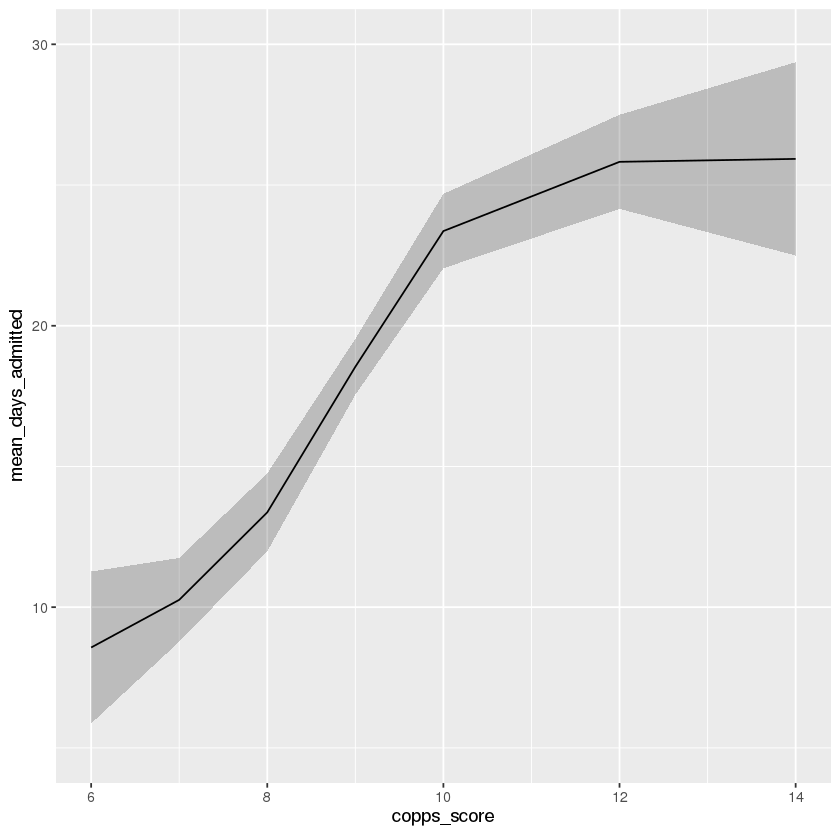

In [19]:
ggplot(Predict(m1.1,copps_score))

In [21]:
m1.2=ols(mean_days_admitted ~ copps_group,data=cops)
m1.2

Linear Regression Model
 
 ols(formula = mean_days_admitted ~ copps_group, data = cops)
 
                Model Likelihood     Discrimination    
                   Ratio Test           Indexes        
 Obs      75    LR chi2    126.30    R2       0.814    
 sigma2.8308    d.f.            2    R2 adj   0.809    
 d.f.     72    Pr(> chi2) 0.0000    g        6.058    
 
 Residuals
 
      Min       1Q   Median       3Q      Max 
 -7.10000 -1.50000  0.07692  1.90000  4.90000 
 
 
               Coef    S.E.   t     Pr(>|t|)
 Intercept      7.5000 1.1557  6.49 <0.0001 
 copps_group=B  7.4231 1.2414  5.98 <0.0001 
 copps_group=C 17.6000 1.2660 13.90 <0.0001 
 

Reference:  Welch's ANOVA is used as a default. (Delacre, Leys, Mora, & Lakens, PsyArXiv, 2018).

Note:  Shapiro-Wilk Normality Test for mean_days_admitted : p-value =  0.002

Note:  Bartlett's test for homogeneity of variances for factor copps_group : p-value =  0.024

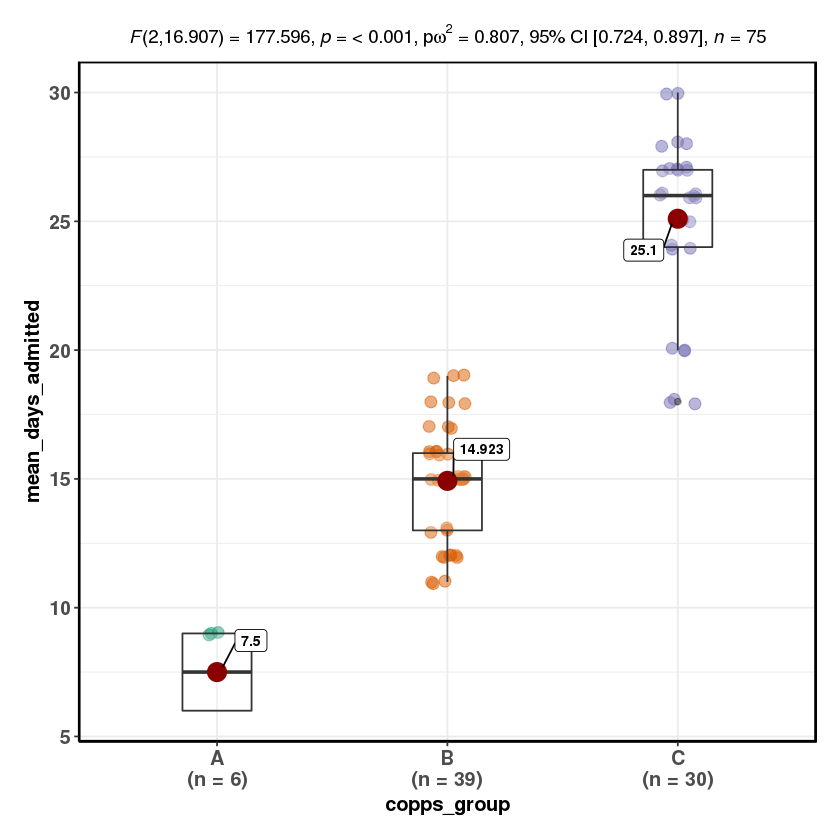

In [24]:
library (ggstatsplot)
ggbetweenstats(x=copps_group,y=mean_days_admitted,
               plot.type="box",data=cops)

In [13]:
m2=ols(mean_days_admitted~bmi+hb_a1c+crp+nrs+platelets,data=cops)

In [14]:
m2

Linear Regression Model
 
 ols(formula = mean_days_admitted ~ bmi + hb_a1c + crp + nrs + 
     platelets, data = cops)
 
                Model Likelihood     Discrimination    
                   Ratio Test           Indexes        
 Obs      75    LR chi2     15.63    R2       0.188    
 sigma6.0475    d.f.            5    R2 adj   0.129    
 d.f.     69    Pr(> chi2) 0.0080    g        2.670    
 
 Residuals
 
      Min       1Q   Median       3Q      Max 
 -11.8208  -3.6425  -0.5894   4.2952  12.1319 
 
 
           Coef    S.E.   t     Pr(>|t|)
 Intercept 22.1576 5.9425  3.73 0.0004  
 bmi       -0.0555 0.2316 -0.24 0.8114  
 hb_a1c    -0.5684 0.3106 -1.83 0.0715  
 crp        0.0500 0.0149  3.35 0.0013  
 nrs        0.3334 0.4027  0.83 0.4106  
 platelets -0.0041 0.0063 -0.65 0.5151  
 

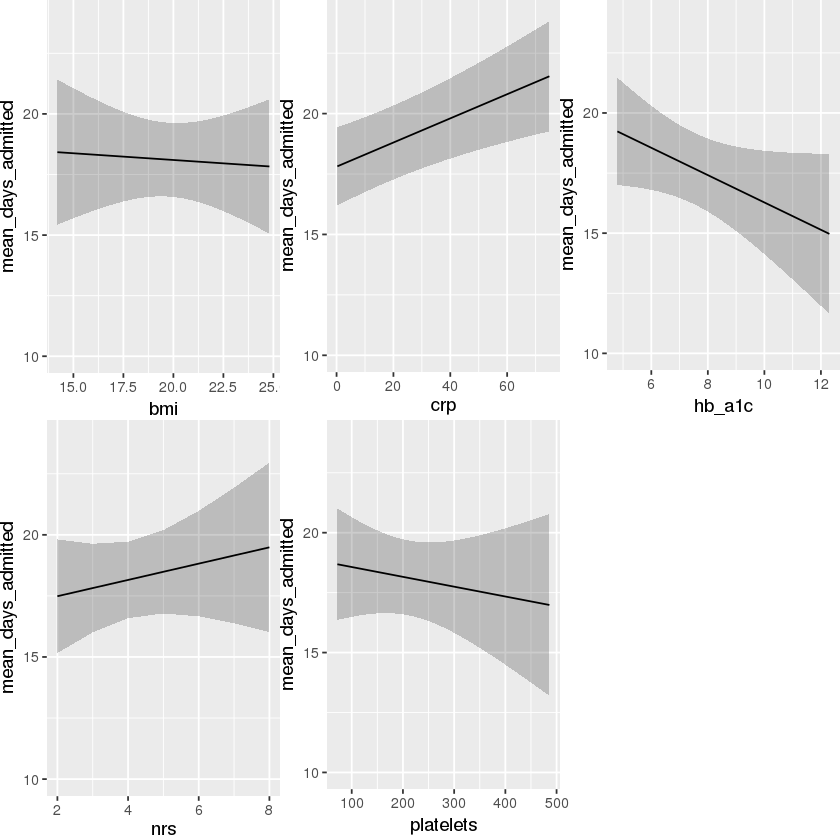

In [15]:
ggplot(Predict(m2))

we see CRP and HbA1c are best predictors of mean days admission

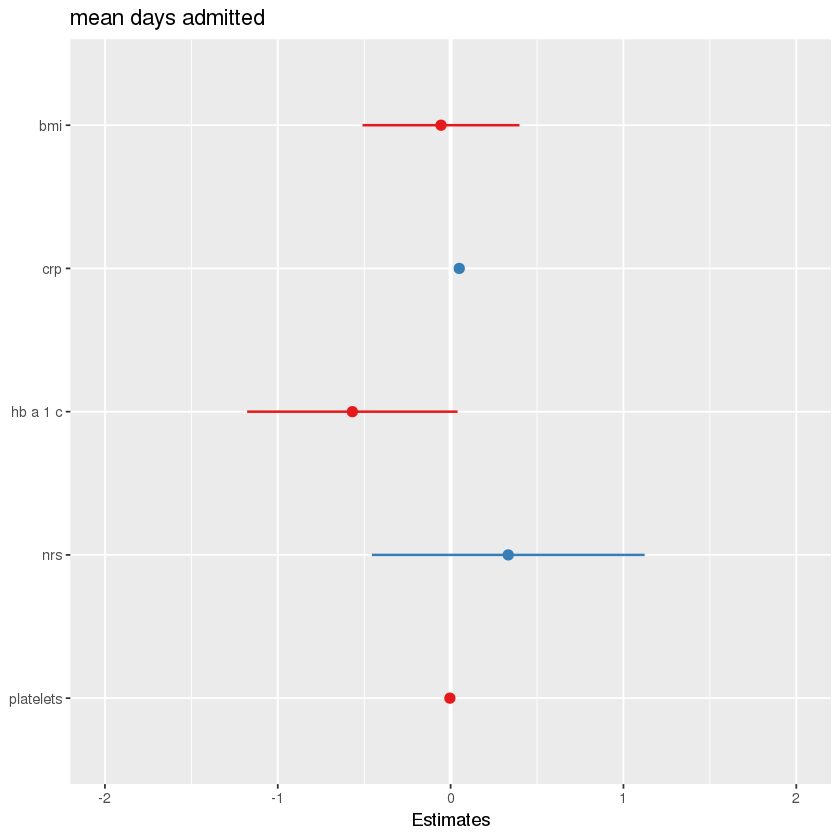

In [17]:
library(sjPlot)
m2.1=lm(mean_days_admitted~bmi+hb_a1c+crp+nrs+platelets,data=cops)
plot_model(m2.1)

In [18]:
library (finalfit)
dependent="mean_days_admitted"
explanatory=c("bmi","hb_a1c","crp","nrs","platelets")
cops%>%finalfit(dependent, explanatory) -> t

t


,Dependent: mean_days_admitted,,Mean (sd),Coefficient (univariable),Coefficient (multivariable)
,<chr>,<chr>,<chr>,<chr>,<chr>
1,bmi,"[13.9,26.6]",18.4 (6.5),"-0.03 (-0.48 to 0.43, p=0.910)","-0.06 (-0.52 to 0.41, p=0.811)"
3,hb_a1c,"[4.4,14]",18.4 (6.5),"-0.38 (-0.98 to 0.22, p=0.207)","-0.57 (-1.19 to 0.05, p=0.072)"
2,crp,"[0.23,251]",18.4 (6.5),"0.05 (0.02 to 0.07, p=0.002)","0.05 (0.02 to 0.08, p=0.001)"
4,nrs,"[2,8]",18.4 (6.5),"0.58 (-0.25 to 1.42, p=0.166)","0.33 (-0.47 to 1.14, p=0.411)"
5,platelets,"[68,511]",18.4 (6.5),"-0.00 (-0.02 to 0.01, p=0.695)","-0.00 (-0.02 to 0.01, p=0.515)"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


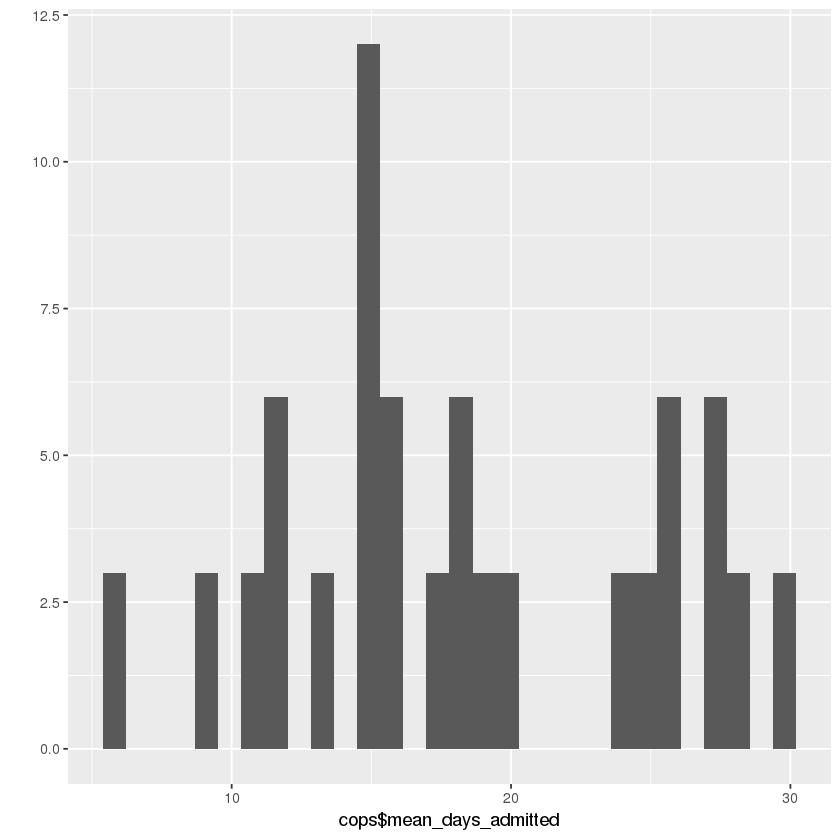

In [13]:
qplot(cops$mean_days_admitted)

Warning message:
“Ignoring unknown parameters: method, se”

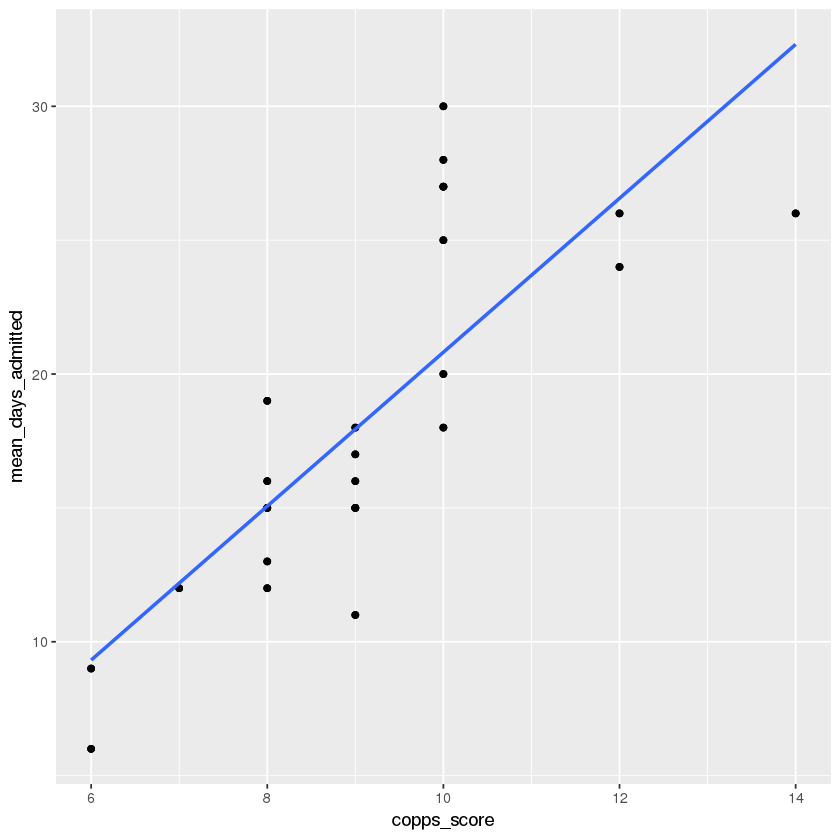

In [27]:
qplot(data=cops,x=copps_score,y=mean_days_admitted,
      geom = c("point", "smooth"), method="lm")